In [1]:
import numpy as np 
import pandas as pd
import os

In [3]:
# Get the absolute path of the file
file_data = os.path.abspath("spam.csv")

data = pd.read_csv(file_data, encoding='ISO-8859-1')
print(data.sample(5))


        v1                                                 v2 Unnamed: 2  \
1767   ham                         K, want us to come by now?        NaN   
289    ham  Dear,shall mail tonite.busy in the street,shal...        NaN   
3754   ham    \Im on gloucesterroad what are uup to later?\""        NaN   
1829  spam  Hottest pics straight to your phone!! See me g...        NaN   
5157   ham                            K k:) sms chat with me.        NaN   

     Unnamed: 3 Unnamed: 4  
1767        NaN        NaN  
289         NaN        NaN  
3754        NaN        NaN  
1829        NaN        NaN  
5157        NaN        NaN  


In [4]:
#Data cleaning 

data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace = True)
data.rename(columns={'v1': 'target', 'v2':'text'}, inplace = True )

data.sample(5)


,target,text
3468,ham,All day working day:)except saturday and sunday..
758,ham,U should have made an appointment
5204,ham,How come she can get it? Should b quite diff t...
66,ham,"Today is \song dedicated day..\"" Which song wi..."
1812,ham,\Getting tickets 4 walsall tue 6 th march. My ...


In [7]:
#check duplicate vales and then remove duplicate value

data.duplicated().sum()

data = data.drop_duplicates(keep = 'first')

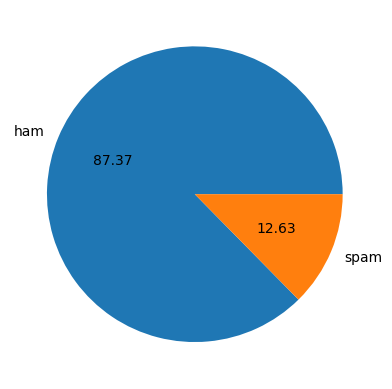

In [8]:
#EDA

import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels= ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
data['num_characters'] = data['text'].apply(len)
# num of words
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


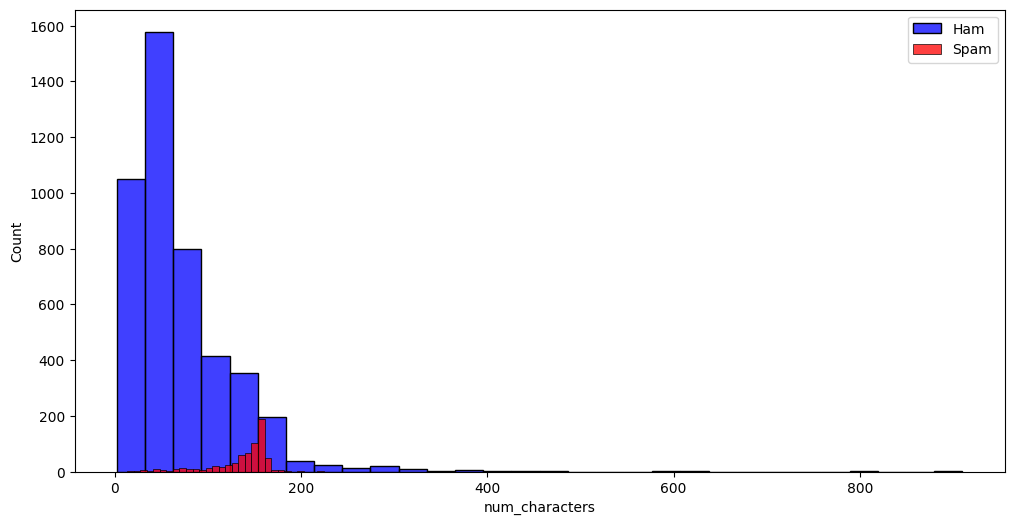

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(data=data[data['target'] == 0]['num_characters'], kde=False, bins=30, color='blue', label='Ham')
sns.histplot(data=data[data['target'] == 1]['num_characters'], kde=False, bins=30, color='red', label='Spam')

plt.legend()
plt.show()


In [48]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [26]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [28]:
#Model building

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [30]:
x = tfidf.fit_transform(data['transformed_text']).toarray()

y = data['target'].values

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
def clean_data(text):
    text = re.sub(r'[^\w\s]', '', text)  # Removing characters except words and spaces
    text = text.lower()  # Lowercasing for consistency
    text = re.sub('\n', '', text)
    return text


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Example text data (should be your actual training data)
texts = ["This is a ham message", "This is a spam message"]
labels = [0, 1]  # 0 for ham, 1 for spam

# Initialize and fit the CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(texts)  # Fit and transform the training data
y = labels

# Initialize and train the classifier
dt = DecisionTreeClassifier()
dt.fit(X, y)

# Clean and transform a sample text
sample_text = "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
sample_cleaned = transform_text(sample_text)

# Transform the cleaned sample text
data1 = cv.transform([sample_cleaned]).toarray()

# Predict the class of the sample text
prediction = dt.predict(data1)

# Mapping the prediction back to a label
print("Prediction:", "This message is", "Spam" if prediction[0] == 1 else "Ham")


Prediction: This message is Spam
